In [2]:
#importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline 
from datetime import datetime as dt

In [3]:
#loading the data 
data=pd.read_csv('201902-fordgobike-tripdata (1).csv')

In [4]:
#displaying the 5 rows of the data 
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
#summary description of the data 
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
#searching for the null values 
data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#dropping the null values 
data.dropna(axis=0,inplace=True)

In [9]:

data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [10]:
#searching for any duplicates 
data.duplicated().sum()

0

In [11]:
#searching for columns values 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [12]:
#transferring coulumns into dates 
data['start_time']=pd.to_datetime(data['start_time'])
data['end_time']=pd.to_datetime(data['end_time'])

In [13]:
#extracting columns from dates 
data['month_day_start']=data['start_time'].dt.day
data['month_start']=data['start_time'].dt.month
data['day_of_week_start']=data['start_time'].dt.weekday

In [14]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,month_start,day_of_week_start
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,28,2,3
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,28,2,3
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,28,2,3
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,28,2,3
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,28,2,3


In [15]:
#renaming the weekday column
data['day_of_week_start']=data['day_of_week_start'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

In [16]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,month_start,day_of_week_start
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,28,2,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,28,2,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,28,2,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,28,2,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,28,2,Thursday


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
month_day_start            174952 non-null int64
month_start        

In [18]:
#extracting the hour 
data['start_hour']=data['start_time'].dt.hour

In [19]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,month_start,day_of_week_start,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,28,2,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,28,2,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,28,2,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,28,2,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,28,2,Thursday,23


In [20]:
#making the birth year as int instead of float
data['member_birth_year']=data['member_birth_year'].astype('int')

In [21]:
#creating the user age column 
data['user_age']=2021-data['member_birth_year']

In [22]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,month_start,day_of_week_start,start_hour,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984,Male,No,28,2,Thursday,17,37
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972,Male,No,28,2,Thursday,12,49
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989,Other,No,28,2,Thursday,17,32
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974,Male,Yes,28,2,Thursday,23,47
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959,Male,No,28,2,Thursday,23,62


In [23]:
#creating the duration of minutes instead of seconds 
data['duration_min']=data['duration_sec']/60

In [24]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,month_start,day_of_week_start,start_hour,user_age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,28,2,Thursday,17,37,869.750000
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,28,2,Thursday,12,49,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,28,2,Thursday,17,32,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,28,2,Thursday,23,47,26.416667
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,28,2,Thursday,23,62,29.883333


# Univariate Explorations

In [66]:
"""The next 4 cells are about making functions in order to reducing the number of code lines"""

'The next 4 cells are about making functions in order to reducing the number of code lines'

In [25]:
#a function to make countplot 
def countplot(x):
    plt.figure(figsize=(20,10))
    color=sns.color_palette()[0]
    sns.countplot(x,color=color)
    title=input('what is your desired title')
    plt.title(title,fontsize=20)
    x_label=input('What is your desired x label')
    plt.xlabel(x_label,fontsize=20)
    ylabel=input('What is your desired y label')
    plt.ylabel(ylabel,fontsize=20)
    plt.show()

In [26]:
#a function to make boxplot
def boxplot(x):
    plt.figure(figsize=(20,10))
    color=sns.color_palette()[0]
    sns.boxplot(x,color=color)
    title=input('what is your desired title')
    plt.title(title,fontsize=20)
    x_label=input('What is your desired x label')
    plt.xlabel(x_label,fontsize=20)
    ylabel=input('What is your desired y label')
    plt.ylabel(ylabel,fontsize=20)
    plt.show()
    

In [28]:
#a function to make distripution plot
def distplot(x):
    plt.figure(figsize=(20,10))
    color=sns.color_palette()[0]
    sns.distplot(x,color=color)
    title=input('what is your desired title')
    plt.title(title,fontsize=20)
    x_label=input('What is your desired x label')
    plt.xlabel(x_label,fontsize=20)
    ylabel=input('What is your desired y label')
    plt.ylabel(ylabel,fontsize=20)
    plt.show()
    
    

In [29]:
#a function to make violinplot
def violinplot(x):
    plt.figure(figsize=(20,10))
    color=sns.color_palette()[0]
    sns.violinplot(x,color=color)
    title=input('what is your desired title')
    plt.title(title,fontsize=20)
    x_label=input('What is your desired x label')
    plt.xlabel(x_label,fontsize=20)
    ylabel=input('What is your desired y label')
    plt.ylabel(ylabel,fontsize=20)
    plt.show()

what is your desired titledistributions in the trip durations 
What is your desired x labeltrip durations per minute
What is your desired y labeldistributions 


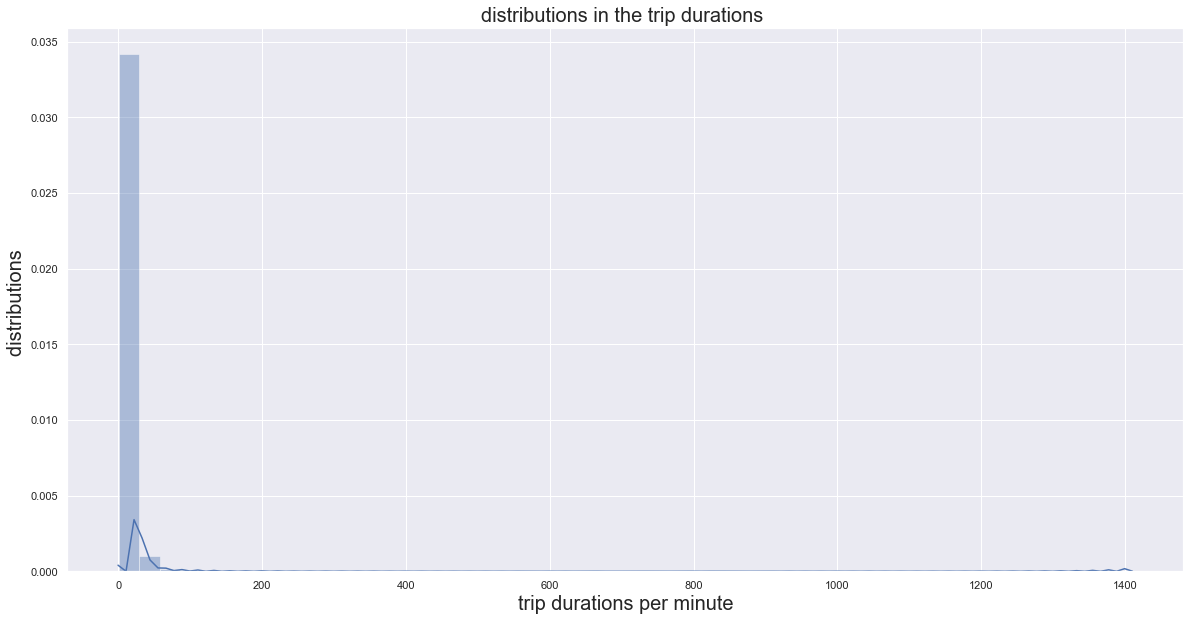

In [30]:
distplot(data.duration_min)

what is your desired titleLooking for the outliers in the durations 
What is your desired x labeldurations per mins
What is your desired y labeldistributions


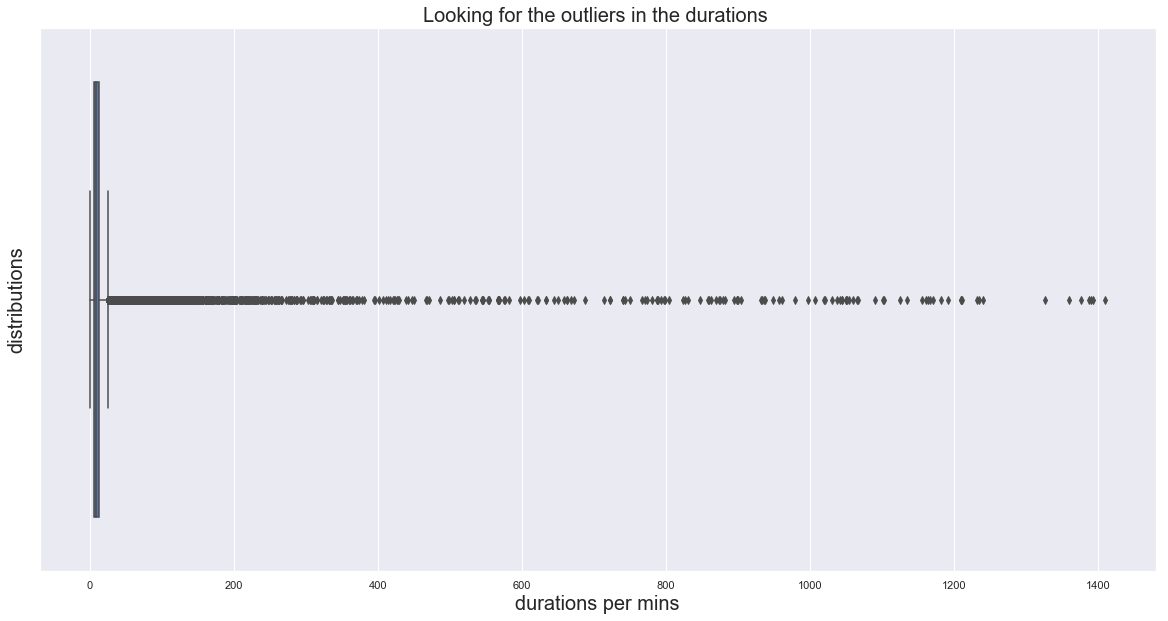

In [30]:
boxplot(data.duration_min)

In [ ]:
#observation:
"""There are too many outliers in the durations so I'm removing them """

In [31]:
data=data[data['duration_min']<=30]

what is your desired titledistributions after removing the outliers 
What is your desired x labeldurations per minutes
What is your desired y labeldistributions 


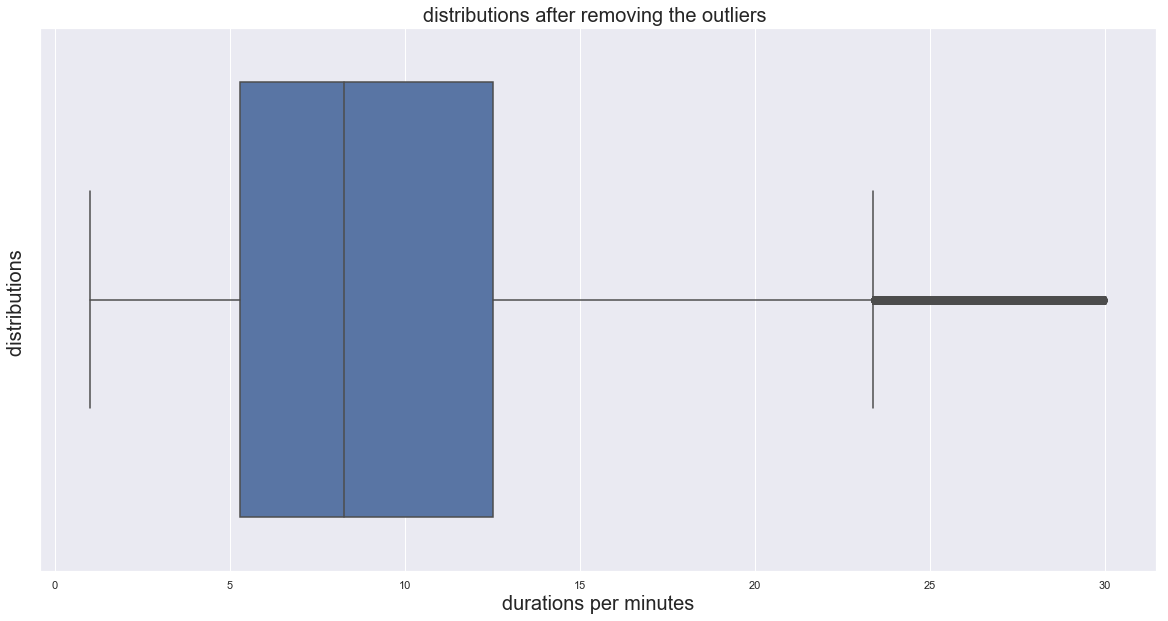

In [32]:
boxplot(data.duration_min)

In [67]:
"""After removing the outliers , the boxplot considers the trips longer than 22 mins are outliers so I'm removing them also"""

"After removing the outliers , the boxplot considers the trips longer than 22 mins are outliers so I'm removing them also"

In [33]:
#removing durations longer than 22 mins 
data=data[data['duration_min']<=22]

In [82]:
"""What are the insights of the durations of users ?"""

'What are the insights of the durations of users ?'

what is your desired titledurations without outliers 
What is your desired x labeldurations per mins 
What is your desired y labeldistributions 


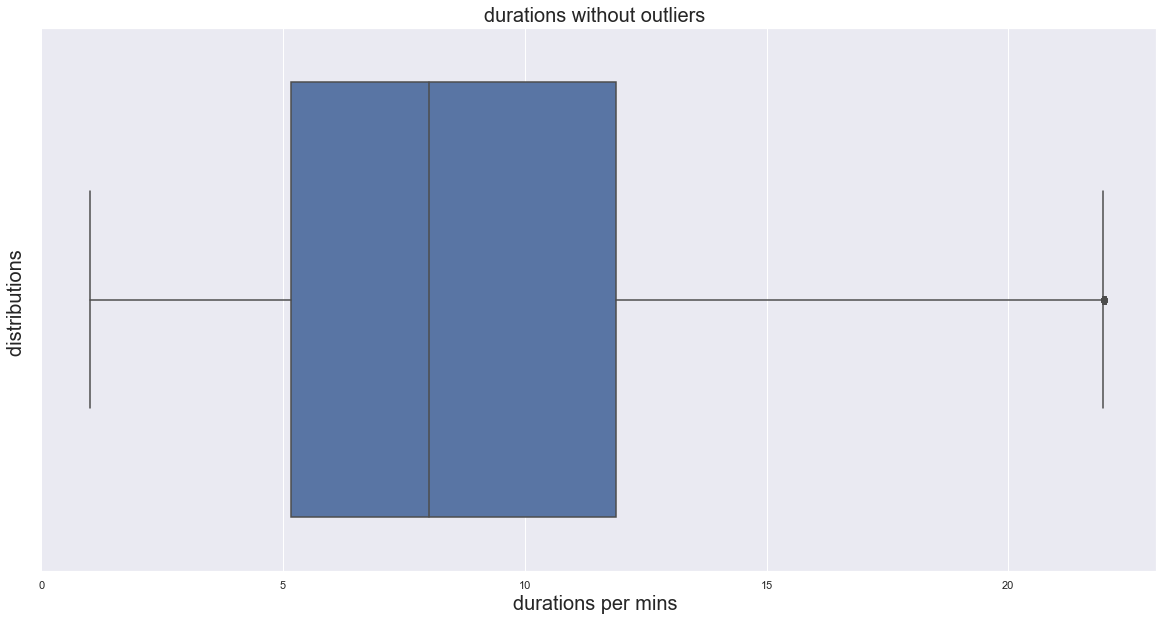

In [34]:
boxplot(data.duration_min)

In [69]:
"""This visualization shows that the median trip duration is about 7 mins , the 25% percentile is about 5 mins and the 75% percentile is about 12 mins  & Most of our trips durations are from 2 mins to 22 mins """

'This visualization shows that the median trip duration is about 7 mins , the 25% percentile is about 5 mins and the 75% percentile is about 12 mins  & Most of our trips durations are from 2 mins to 22 mins '

what is your desired titleviolin plot of the trip durations 
What is your desired x labeldurations per mins 
What is your desired y labeldistributions 


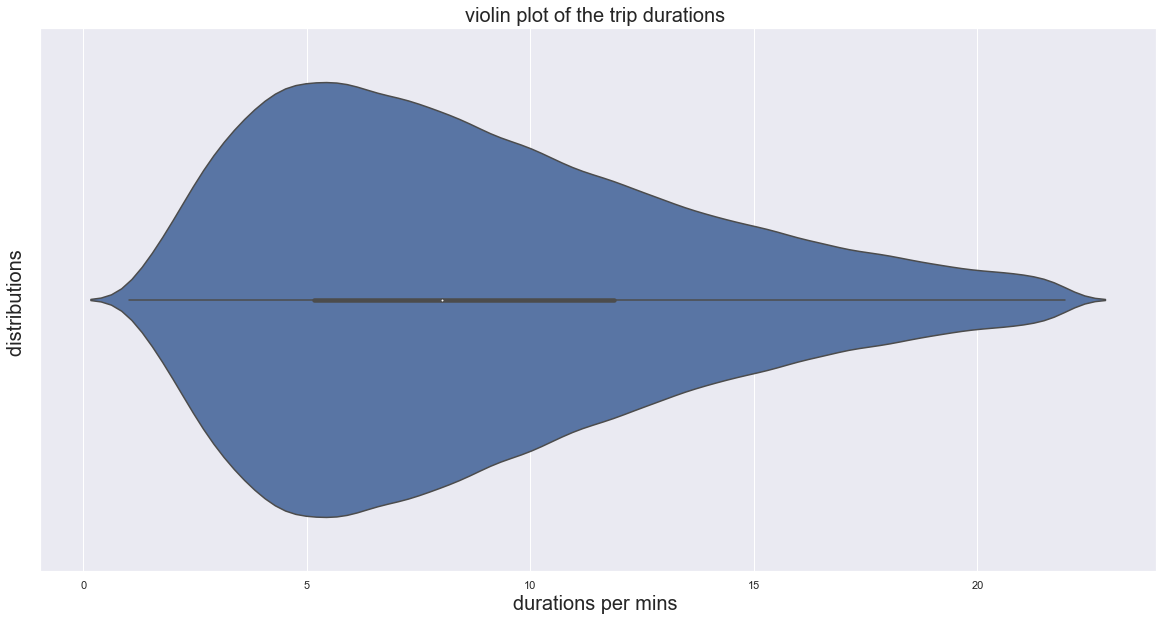

In [35]:
violinplot(data.duration_min)

what is your desired titledistributions of the durations 
What is your desired x labeldurations per mins 
What is your desired y labeldistributions 


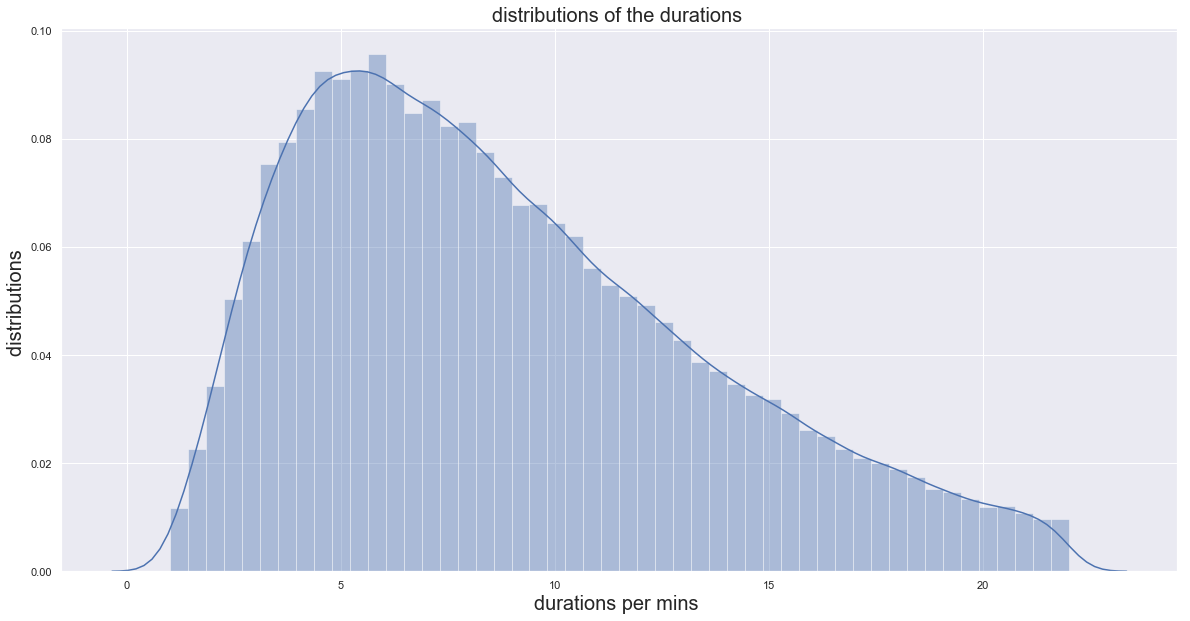

In [36]:
distplot(data.duration_min)

In [70]:
"""Despite the right skewness of the distribution , the visualization tells us that most of our users trips are from 4 to 10 mins """

'Despite the right skewness of the distribution , the visualization tells us that most of our users trips are from 4 to 10 mins '

what is your desired titledistributions of the user ages 
What is your desired x labeluser ages 
What is your desired y labeldistributions 


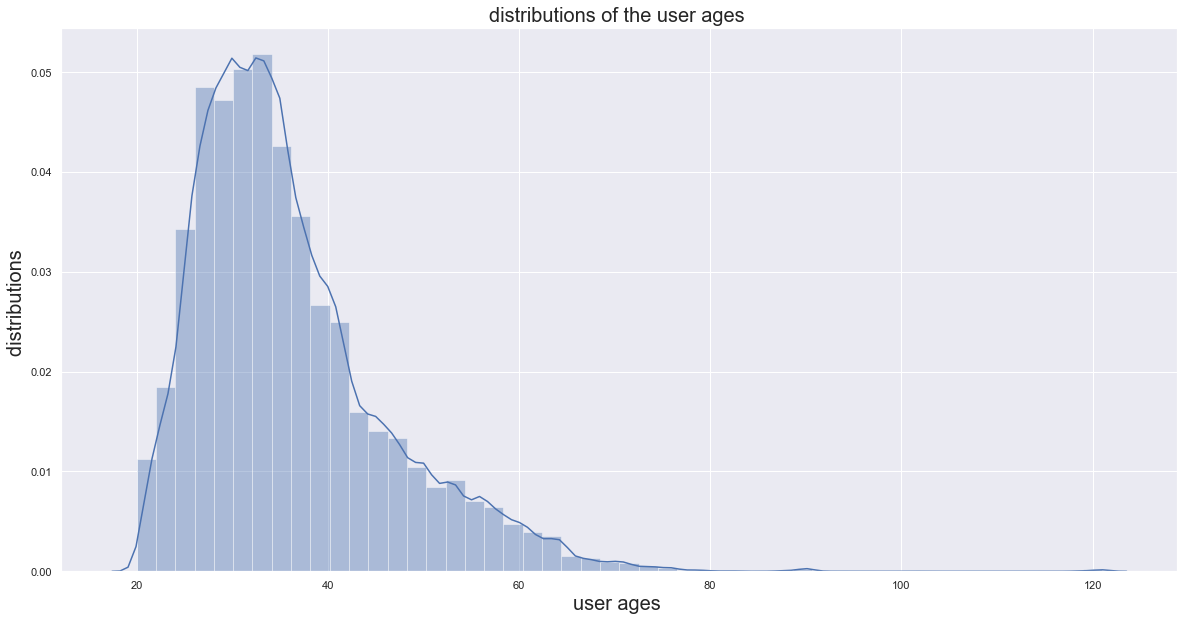

In [37]:
distplot(data.user_age)

In [71]:
""" There are so many outliers in the ages , so I'm removing them """

" There are so many outliers in the ages , so I'm removing them "

what is your desired titlesearching for outliers in the user ages 
What is your desired x labeluser ages 
What is your desired y labeldistributions 


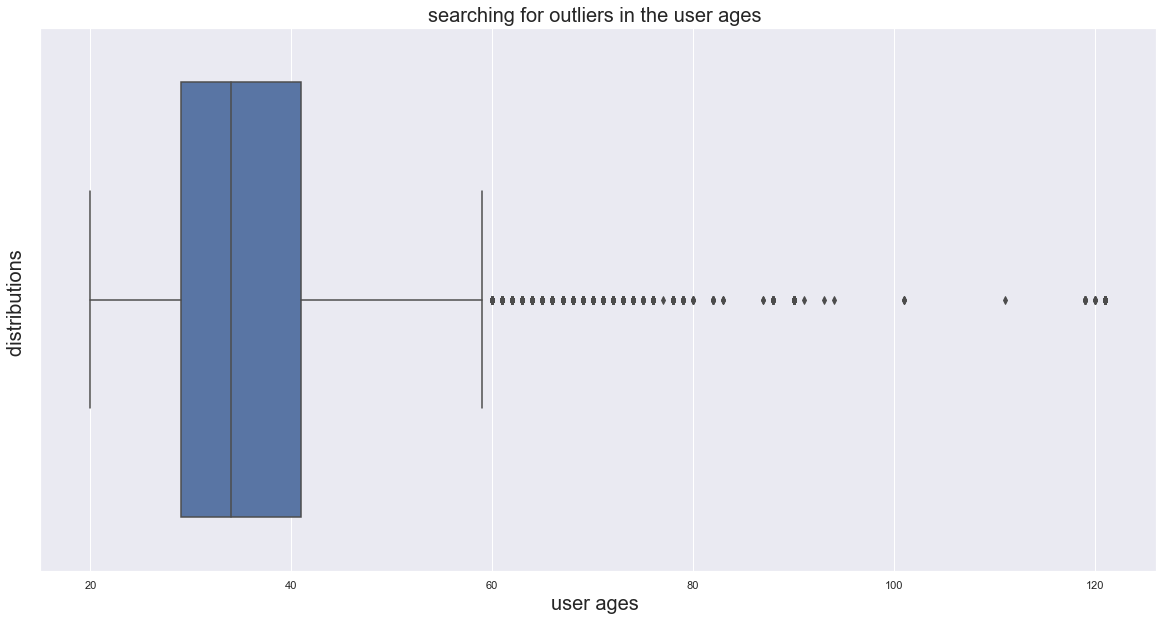

In [38]:
boxplot(data.user_age)

In [72]:
"""This boxplot shows us the outliers in our user ages is people are older than 55 years """

'This boxplot shows us the outliers in our user ages is people are older than 55 years '

In [39]:
data=data[data['user_age']<=55]

In [81]:
"""What are the insights of ours users ages ?"""

'What are the insights of ours users ages ?'

what is your desired titleboxplot distributions after removing the outliers 
What is your desired x labeluser ages 
What is your desired y labeldistributions 


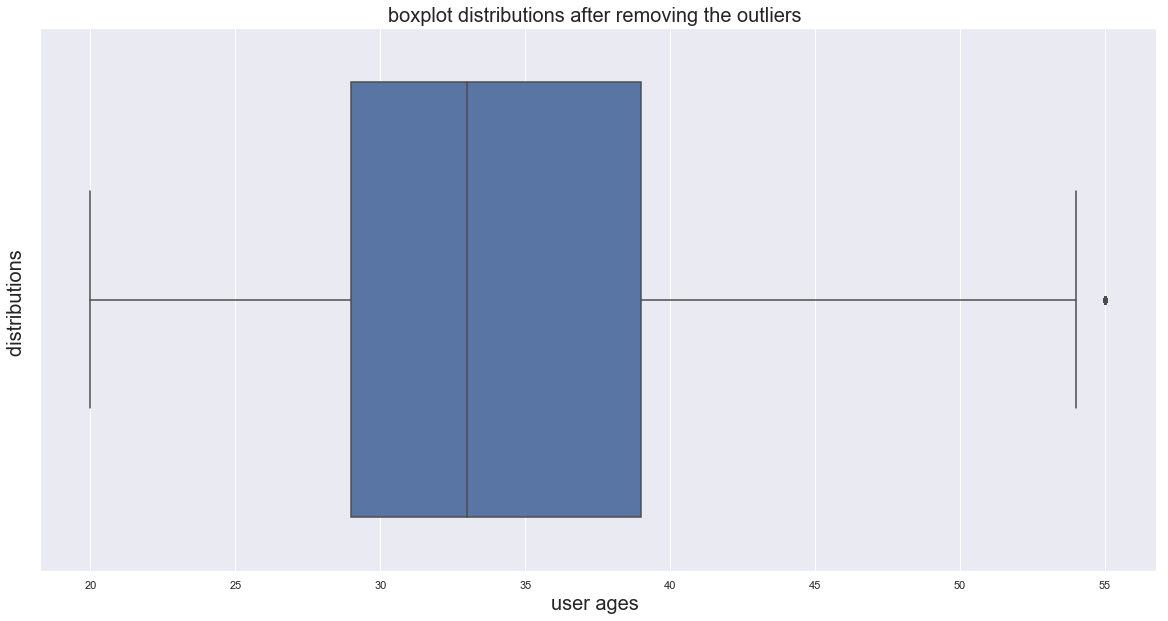

In [40]:
boxplot(data.user_age)

In [73]:
"""The box plot shows us the median of our users are about 33 years old , and they are ranging from 20 years old until 54 years old , with a 25% percentile of 28 years and 75% percentile of 39 years """

'The box plot shows us the median of our users are about 33 years old , and they are ranging from 20 years old until 54 years old , with a 25% percentile of 28 years and 75% percentile of 39 years '

what is your desired titledistributions of user ages without outliers 
What is your desired x labeluser ages 
What is your desired y labeldistributions 


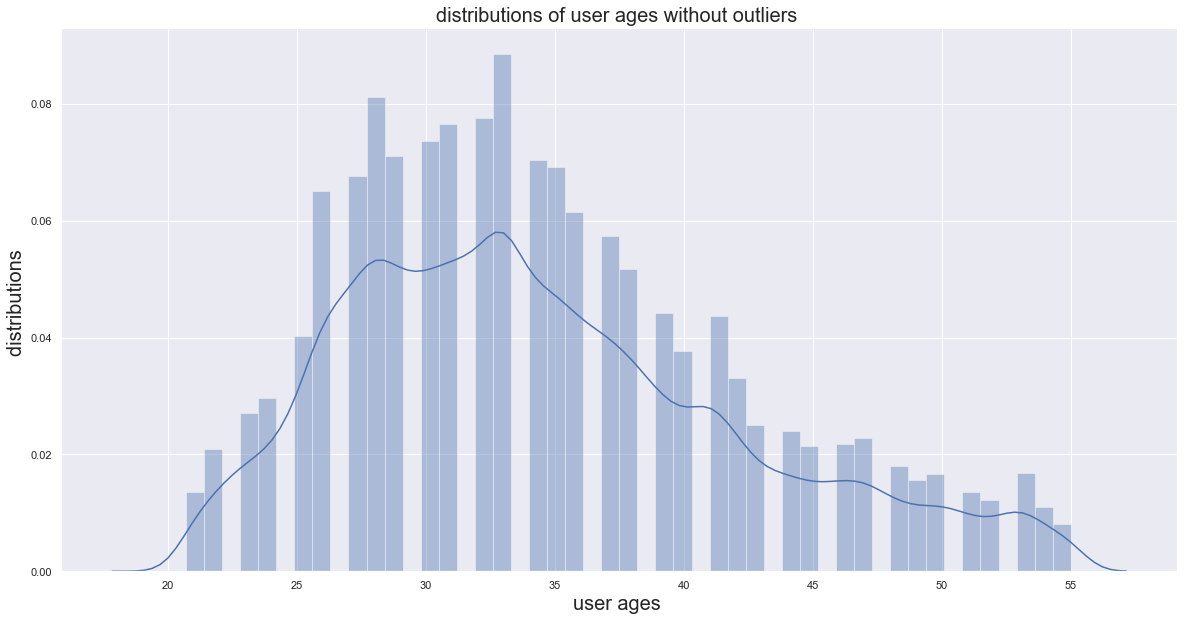

In [41]:
distplot(data.user_age)

In [74]:
"""The distribution shows us most of our users are between 25 - 35 years old """

'The distribution shows us most of our users are between 25 - 35 years old '

what is your desired titleviolinplot of user without distributions 
What is your desired x labeluser ages 
What is your desired y labeldistributions 


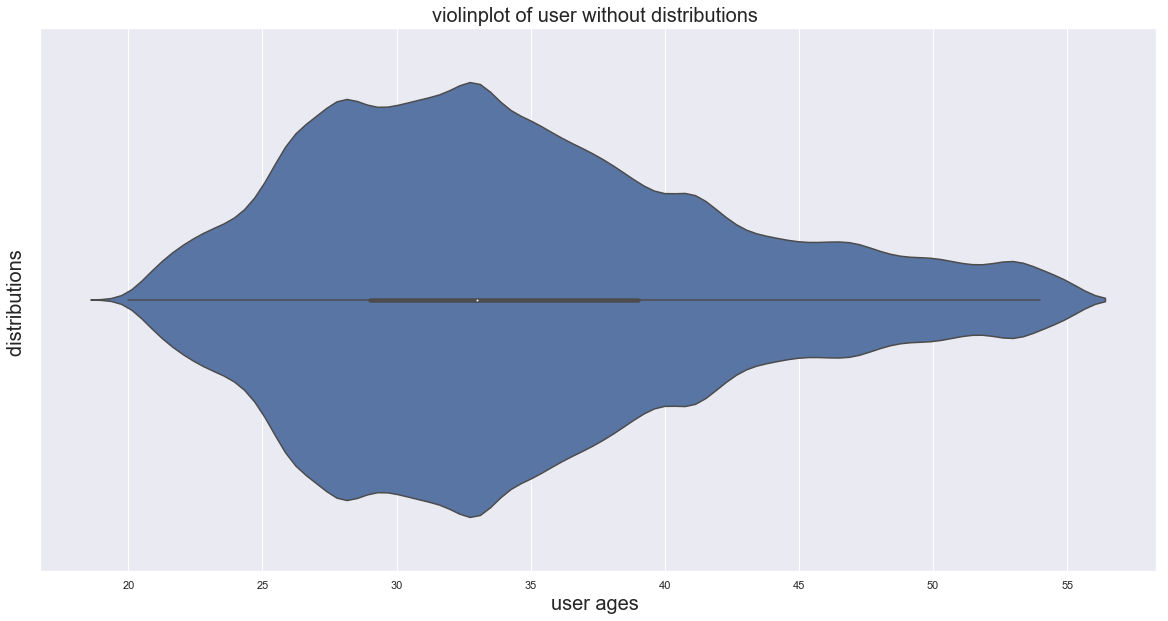

In [42]:
violinplot(data.user_age)

In [43]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,month_start,day_of_week_start,start_hour,user_age,duration_min
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983,Female,No,28,2,Thursday,23,38,19.116667
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,Subscriber,1992,Male,No,28,2,Thursday,23,29,17.483333
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Subscriber,1996,Female,Yes,28,2,Thursday,23,25,7.633333
11,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,...,Subscriber,1993,Male,No,28,2,Thursday,23,28,8.433333
12,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,...,Customer,1990,Male,No,28,2,Thursday,23,31,19.600000


In [45]:
data.shape

(152821, 22)

In [83]:
"""which ours that are the peaks of our trips ?"""

'which ours that are the peaks of our trips ?'

what is your desired titlewhich ours are the peaks of our business 
What is your desired x labelhours of day 
What is your desired y labelcount


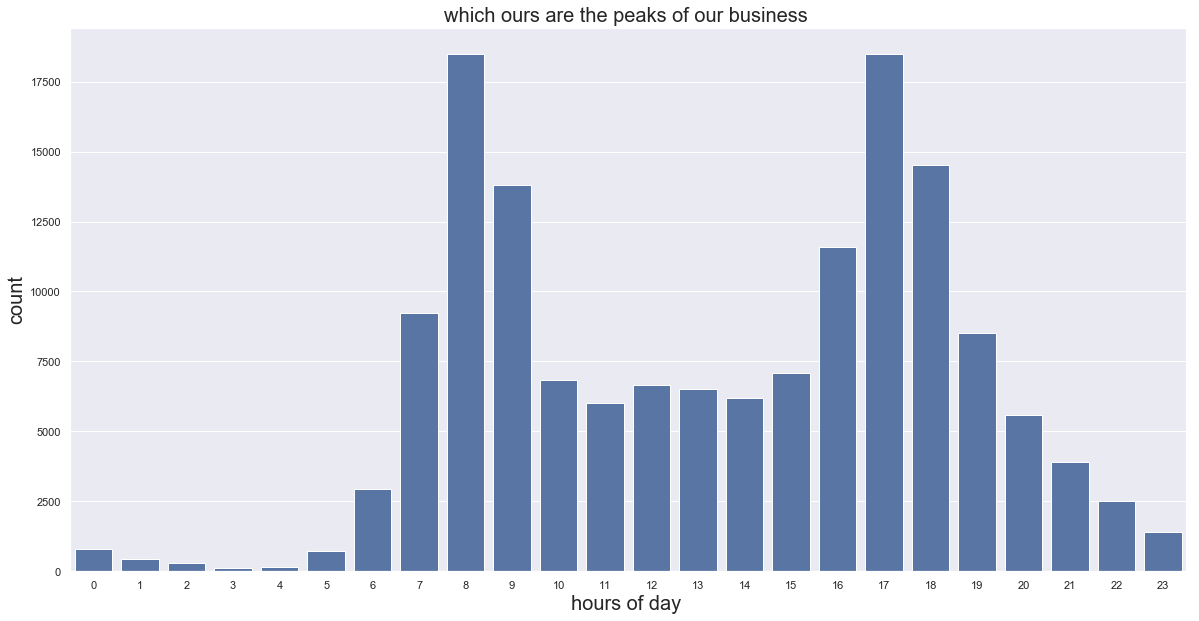

In [46]:
countplot(data.start_hour)

In [75]:
"""The visualizations shows us the most of our trips are between 7-9 am & 4-6 pm """

'The visualizations shows us the most of our trips are between 7-9 am & 4-6 pm '

In [ ]:
"""What are the weekdays peaks of our trips ?"""

what is your desired titlewhich weekdays are the peaks of our business 
What is your desired x labelweekdays 
What is your desired y labelcount


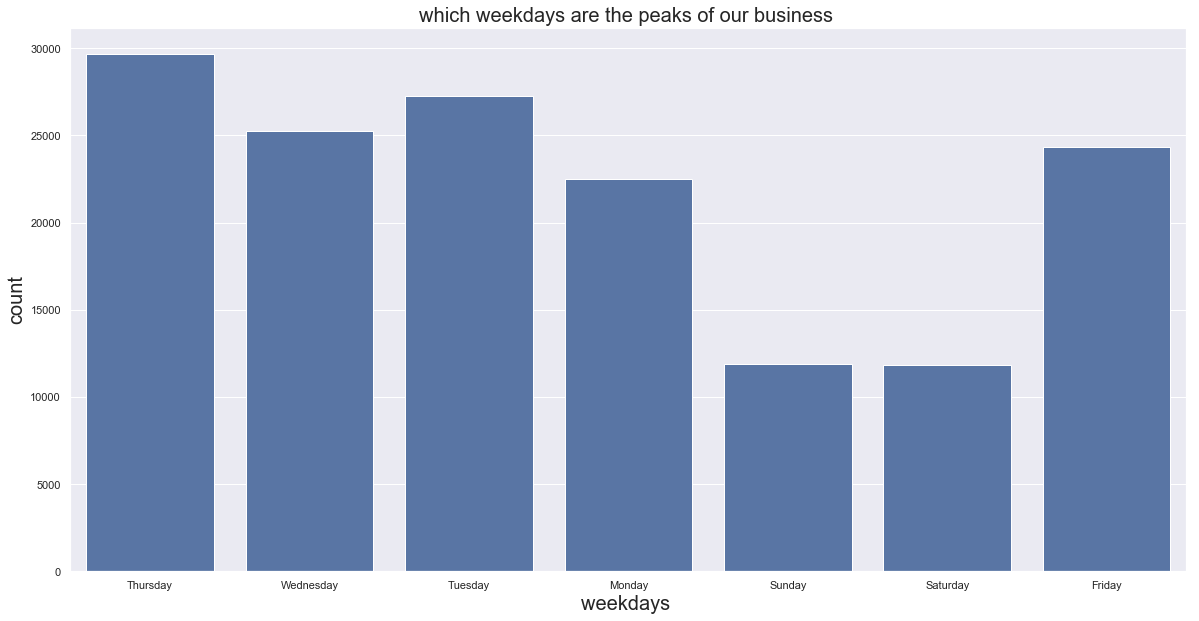

In [47]:
countplot(data.day_of_week_start)

In [76]:
"""The visualization tells us that users are not using our trips that much on weekends """

'The visualization tells us that users are not using our trips that much on weekends '

In [84]:
"""what are the gender segmentations of our users """

'what are the gender segmentations of our users '

what is your desired titlefrequencies of our users genders 
What is your desired x labelmember gender 
What is your desired y labelcount 


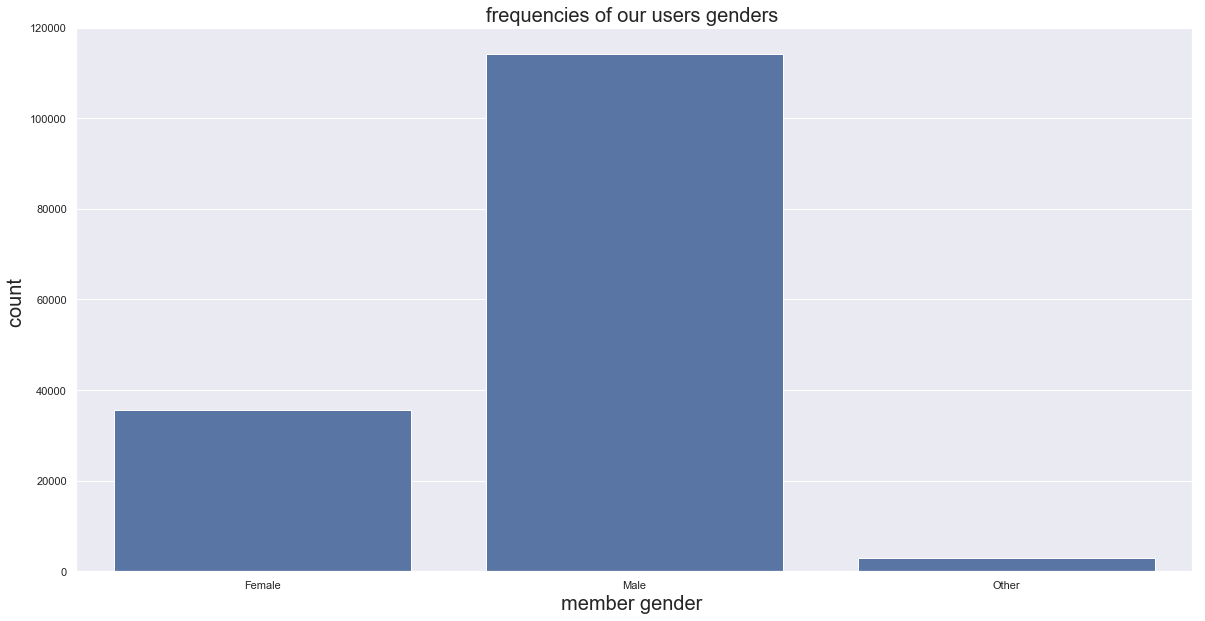

In [48]:
countplot(data.member_gender)

In [77]:
"""Most of our users are Males , females are about 25% percent only """

'Most of our users are Males , females are about 25% percent only '

In [85]:
"""what are the percentage of our user types ?"""

'what are the percentage of our user types ?'

what is your desired titlefrequencies of our user types 
What is your desired x labeluser type
What is your desired y labelcount


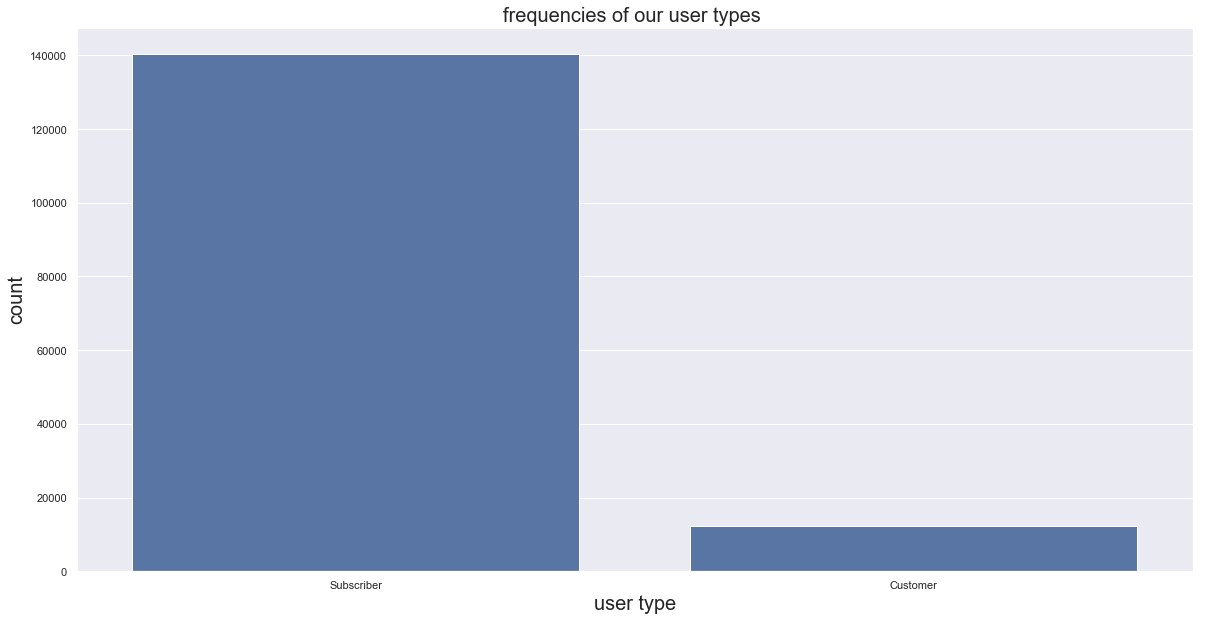

In [49]:
countplot(data.user_type)

In [78]:
""" Most of our users are subscibers ,not customers """

' Most of our users are subscibers ,not customers '

# Bivariate Explorations 

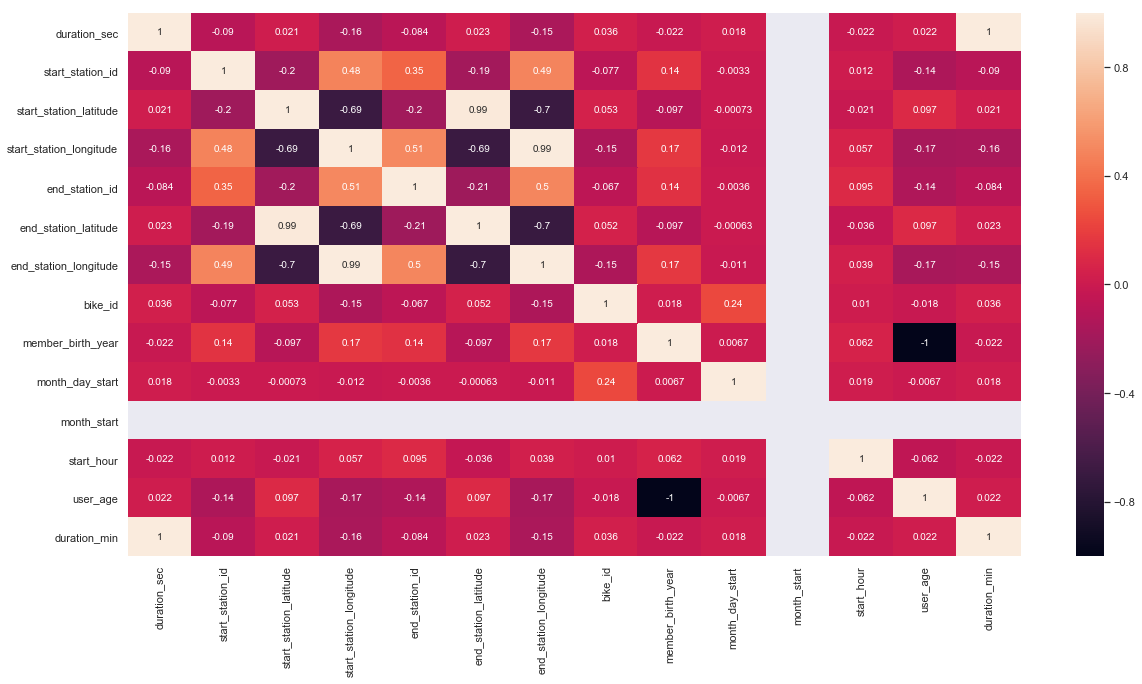

In [50]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [51]:
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month_day_start,month_start,day_of_week_start,start_hour,user_age,duration_min
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983,Female,No,28,2,Thursday,23,38,19.116667
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,Subscriber,1992,Male,No,28,2,Thursday,23,29,17.483333
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Subscriber,1996,Female,Yes,28,2,Thursday,23,25,7.633333
11,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,...,Subscriber,1993,Male,No,28,2,Thursday,23,28,8.433333
12,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,...,Customer,1990,Male,No,28,2,Thursday,23,31,19.600000


In [53]:
def countplot_bi(x,hue):
    plt.figure(figsize=(20,10))
    
    sns.countplot(x,hue=hue)
    title=input('what is your desired title')
    plt.title(title,fontsize=20)
    x_label=input('What is your desired x label')
    plt.xlabel(x_label,fontsize=20)
    ylabel=input('What is your desired y label')
    plt.ylabel(ylabel,fontsize=20)
    plt.xticks(rotation=15)
    plt.show()

what is your desired titlestart hour frequencies per member gender 
What is your desired x labelstart hour 
What is your desired y labelcount


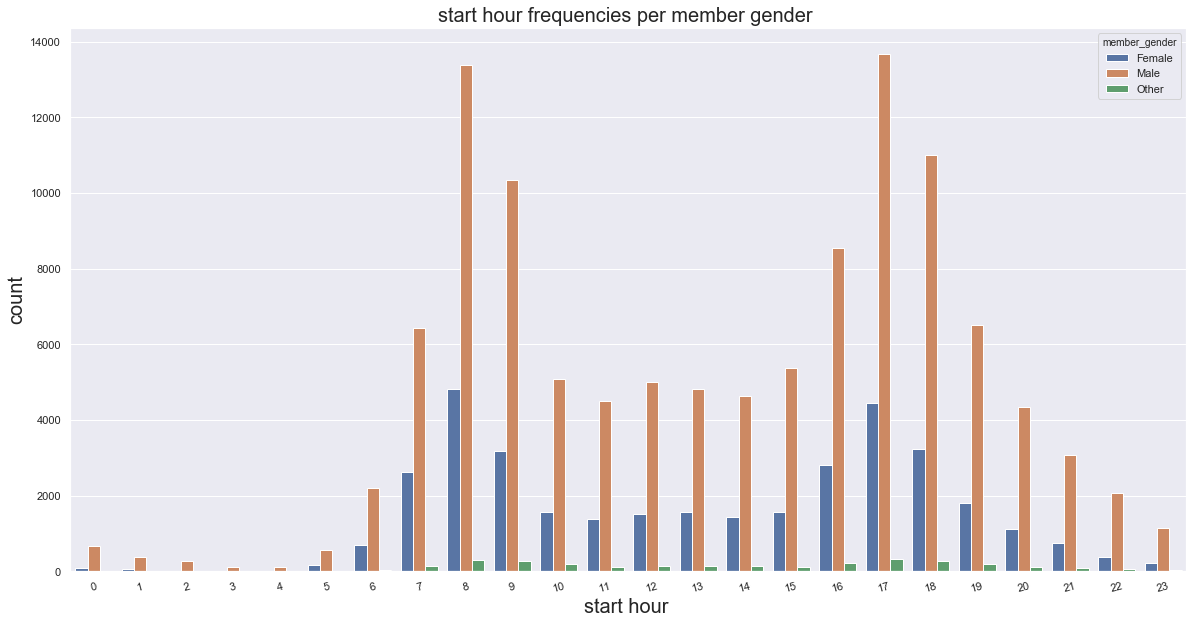

In [54]:
countplot_bi(data.start_hour,data.member_gender)

In [86]:
""" what are the most start hours for our subscribers and our users """

' what are the most start hours for our subscribers and our users '

what is your desired titlestart hour frequencies per user type 
What is your desired x labelstart hour 
What is your desired y labelcount


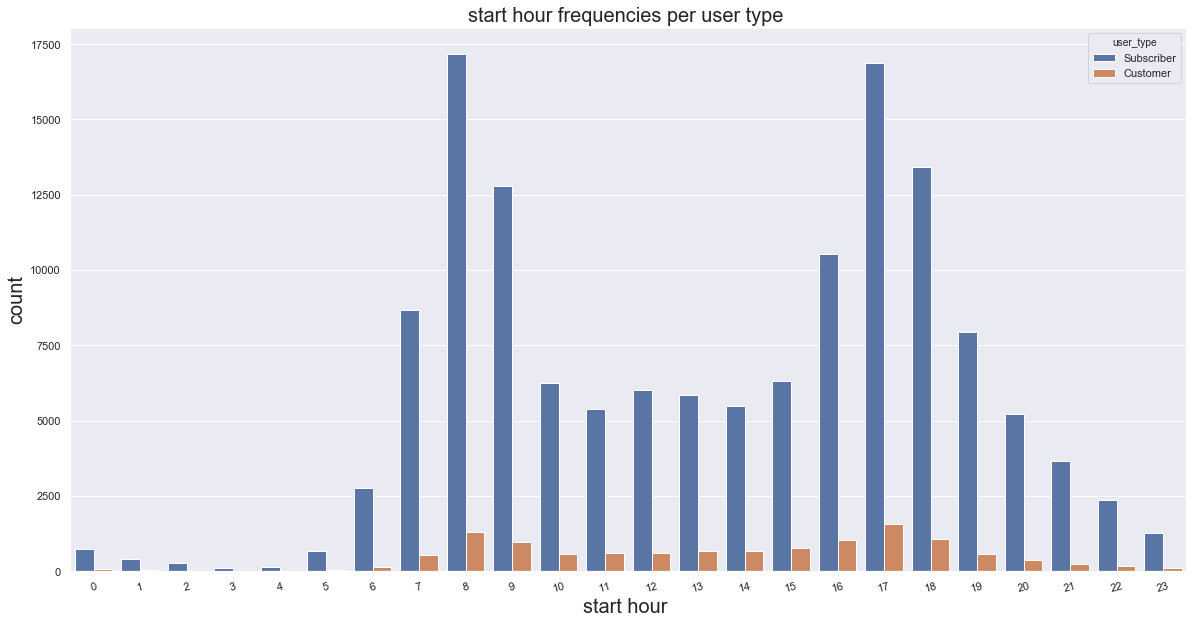

In [55]:
countplot_bi(data.start_hour,data.user_type)

what is your desired titleday of week frequencies per memeber gender 
What is your desired x labelday of week 
What is your desired y labelcount 


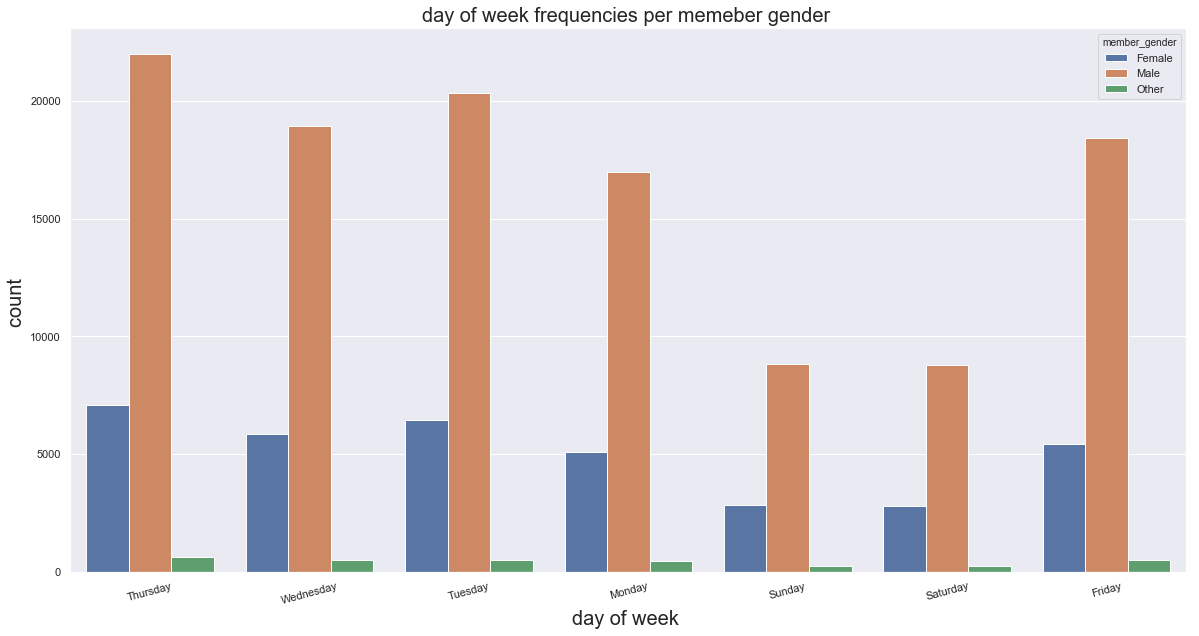

In [56]:
countplot_bi(data.day_of_week_start,data.member_gender)

what is your desired titleday of week frequencies per user type 
What is your desired x labelday of week 
What is your desired y labelcount 


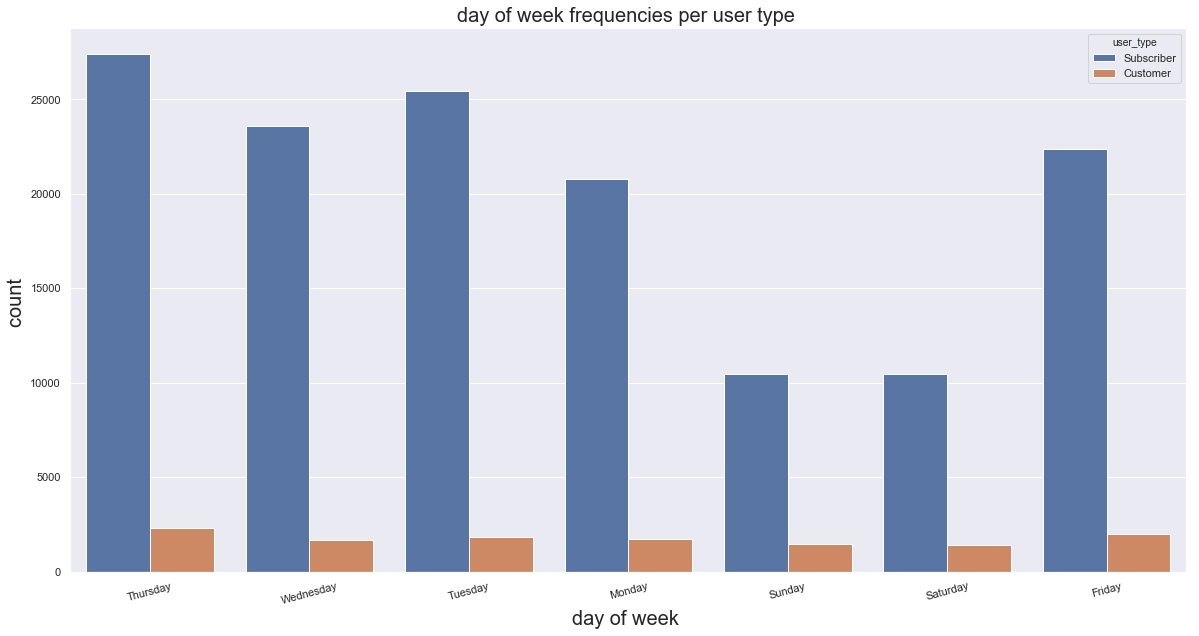

In [57]:
countplot_bi(data.day_of_week_start,data.user_type)

what is your desired titlemember gender frequencies per user type 
What is your desired x labelmember gender 
What is your desired y labeluser type 


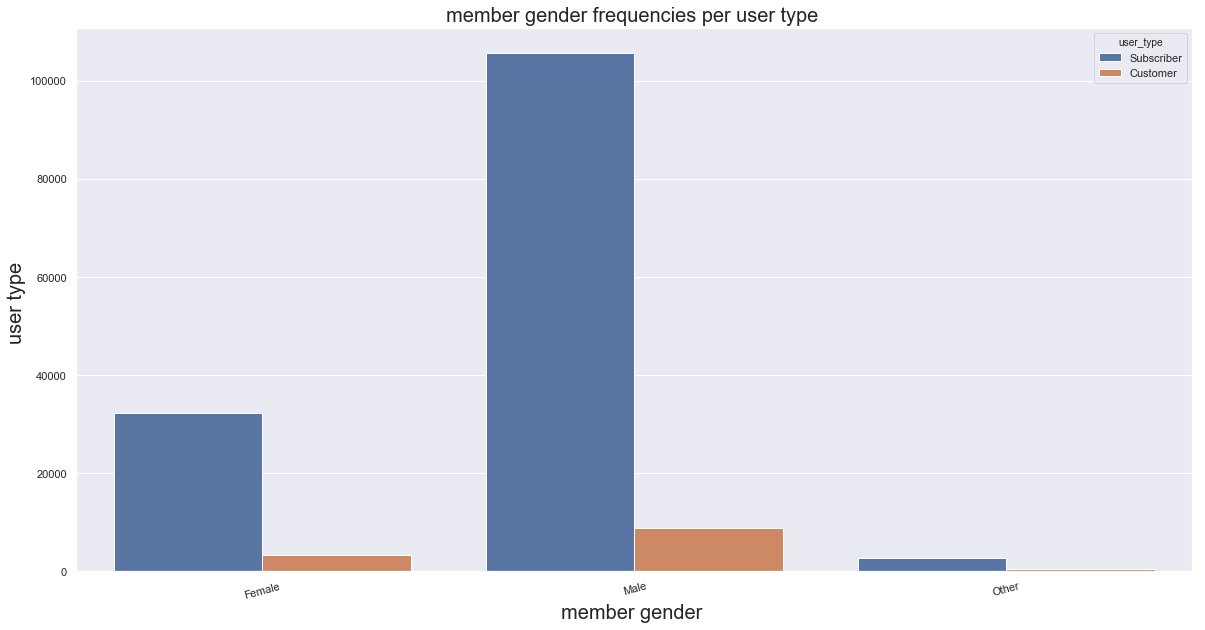

In [58]:
countplot_bi(data.member_gender,data.user_type)

# Multivariable explorations 

In [59]:
def barplot_multi(x,y,hue):
    plt.figure(figsize=(20,10))
    
    sns.barplot(x,y,hue=hue)
    title=input('what is your desired title')
    plt.title(title,fontsize=20)
    x_label=input('What is your desired x label')
    plt.xlabel(x_label,fontsize=20)
    ylabel=input('What is your desired y label')
    plt.ylabel(ylabel,fontsize=20)
    plt.xticks(rotation=15)
    plt.show()

what is your desired titleuser age and durations mins per gender 
What is your desired x labeluser age 
What is your desired y labeldurations mins 


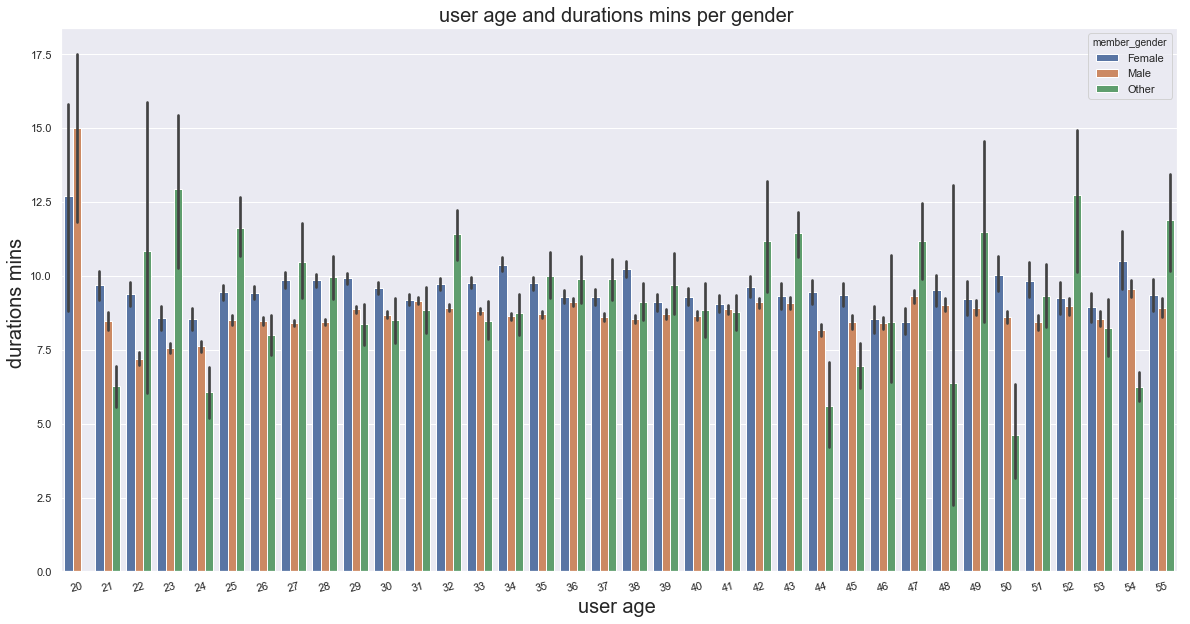

In [61]:
barplot_multi(data.user_age,data.duration_min,data.member_gender)

In [87]:
"""which type of users tend to last longer in the trips """

'which type of users tend to last longer in the trips '

what is your desired titleuser age and durations mins per user type 
What is your desired x labeluser age 
What is your desired y labeldurations mins 


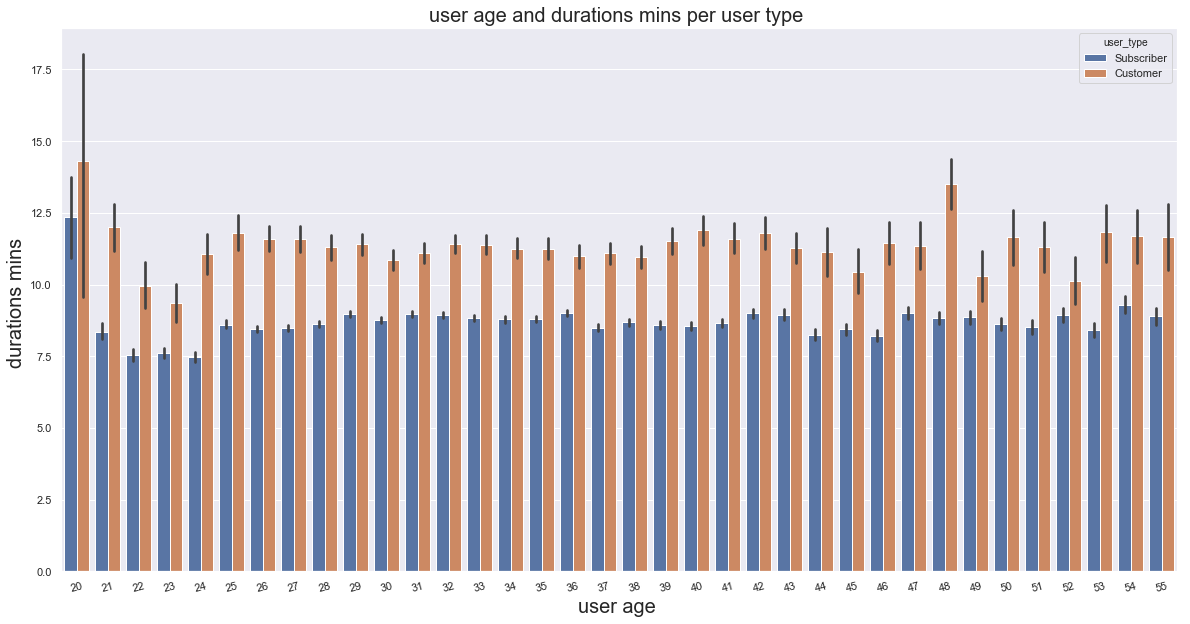

In [62]:
barplot_multi(data.user_age,data.duration_min,data.user_type)

In [79]:
"""Customers tend to last longer in the durations """

'Customers tend to last longer in the durations'

what is your desired titleday of week and duration per user type 
What is your desired x labelday of week 
What is your desired y labeldurations 


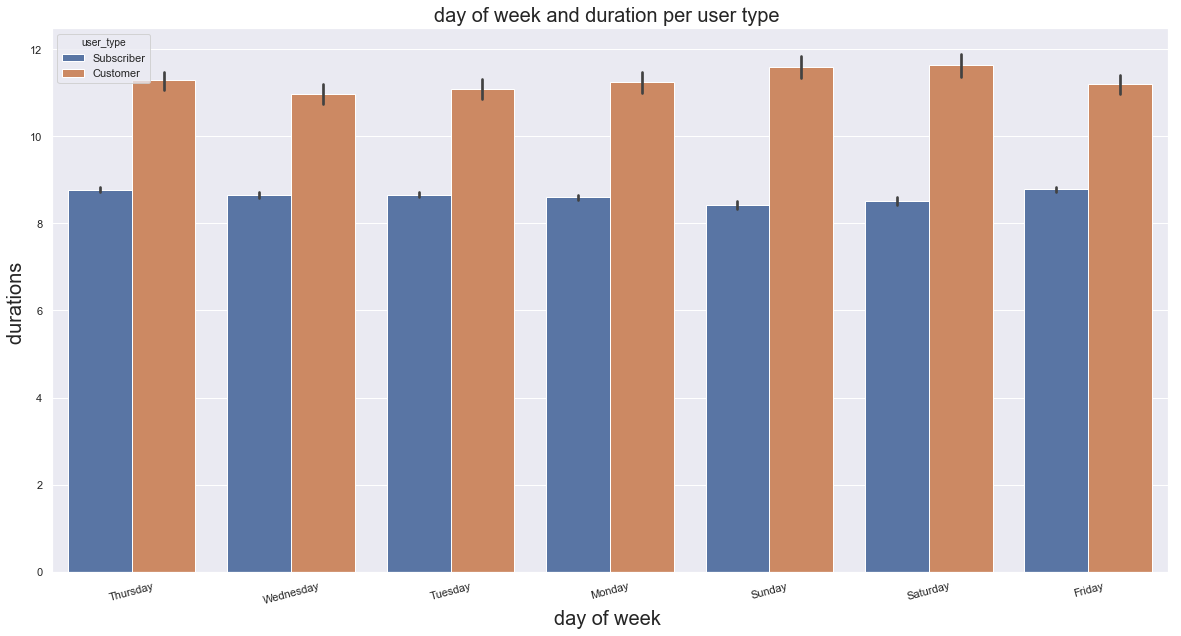

In [63]:
barplot_multi(data.day_of_week_start,data.duration_min,data.user_type)

In [88]:
"""which member gender takes longer in the trips """

'which member gender takes longer in the trips '

what is your desired titleday of week and durations per gender 
What is your desired x labelday of week 
What is your desired y labeldurations 


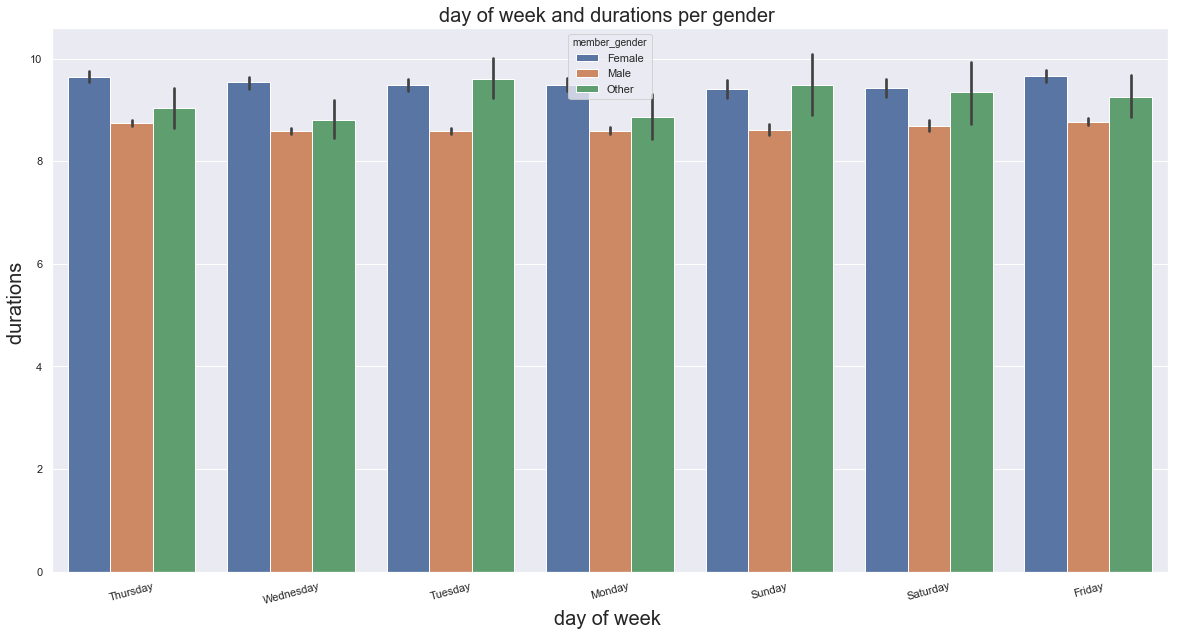

In [64]:
barplot_multi(data.day_of_week_start,data.duration_min,data.member_gender)

In [80]:
"""Females take longer time in the trips """

'Females take longer time in the trips '

In [ ]:
!jupyter nbconvert EXPLOREtrips.ipynb --to slides --post serve --no-input --no-prompt